In [46]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [147]:
df=pd.read_csv('df_merge.csv', low_memory=False, index_col='Unnamed: 0')
df.drop(df.index[1083398], inplace=True)
df

,tx_id,sender_account_id,receiver_account_id,tx_amount,timestamp,tx_type,sender_bank_id,sender_first_name,sender_last_name,sender_country_code,...,reliability_sender_A,reliability_sender_B,ecarts_tx_received_A,ecarts_tx_received_B,ecarts_tx_sent_A,ecarts_tx_sent_B,jour_année_tx,jour_mois_tx,année_tx,mois_tx
0,33859.0,6540.0,9883.0,586.61,2018-04-07,WIRE,A,Aaron,Behrmann,FR,...,1.000000,1.000000,40.656996,-71.348819,0.000000,219.870222,97.0,7.0,2018.0,4.0
1,40948.0,6540.0,9883.0,586.61,2018-04-14,WIRE,A,Aaron,Behrmann,FR,...,1.000000,1.000000,119.650647,-92.223342,0.000000,219.870222,104.0,14.0,2018.0,4.0
2,42015.0,6540.0,9883.0,586.61,2018-04-21,CHECK,A,Aaron,Behrmann,FR,...,1.000000,1.000000,40.656996,-95.501115,0.000000,219.870222,111.0,21.0,2018.0,4.0
3,50884.0,6540.0,9883.0,586.61,2018-04-28,WIRE,A,Aaron,Behrmann,FR,...,1.000000,1.000000,40.656996,-99.820685,0.000000,219.870222,118.0,28.0,2018.0,4.0
4,60406.0,6540.0,9883.0,586.61,2018-05-05,WIRE,A,Aaron,Behrmann,FR,...,1.000000,1.000000,40.656996,-99.908519,0.000000,219.870222,125.0,5.0,2018.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1083393,1111899.0,NaN,3394.0,129.24,2021-05-22,CHECK,C,Zenobia,Janak,FR,...,1.000000,1.000000,-76.651672,-73.518564,-28.671560,0.000000,142.0,22.0,2021.0,5.0
1083394,1182395.0,NaN,3394.0,129.24,2021-07-31,WIRE,C,Zenobia,Janak,FR,...,1.000000,1.000000,-76.651672,-73.518564,-28.671560,0.000000,212.0,31.0,2021.0,7.0
1083395,1248997.0,NaN,3394.0,129.24,2021-10-09,WIRE,C,Zenobia,Janak,FR,...,1.000000,1.000000,-76.651672,-73.518564,-28.671560,0.000000,282.0,9.0,2021.0,10.0
1083396,1313587.0,NaN,3394.0,129.24,2021-12-18,CHECK,C,Zenobia,Janak,FR,...,1.000000,1.000000,-76.651672,-73.518564,-28.671560,0.000000,352.0,18.0,2021.0,12.0


In [148]:
df['timestamp'] = pd.to_datetime(df.timestamp, format='%Y-%m-%d', errors = 'ignore')
df['sender_birth_date'] = pd.to_datetime(df.sender_birth_date, format='%Y-%m-%d', errors = 'ignore')
df['receiver_birth_date'] = pd.to_datetime(df.receiver_birth_date, format='%Y-%m-%d', errors = 'ignore')

In [149]:
df.sort_values(by='timestamp', ascending=True, inplace=True)

In [150]:
df['is_alert_pooled'].value_counts()


False    1082018
True        1380
Name: is_alert_pooled, dtype: int64

In [151]:
def filter_df(time, df_to_filter):
    " Fonction qui renvoie un df trié en ne prenant que les dates du passé "
    " mettre le time sous forme 'yyyy-mm-dd' "
    df_1 = df_to_filter[df_to_filter['timestamp']<time].copy()
    return df_1

## Preprocessing 

### Sélection des features



In [152]:
df.columns

Index(['tx_id', 'sender_account_id', 'receiver_account_id', 'tx_amount',
       'timestamp', 'tx_type', 'sender_bank_id', 'sender_first_name',
       'sender_last_name', 'sender_country_code', 'sender_birth_date',
       'sender_zip_code', 'receiver_bank_id', 'receiver_first_name',
       'receiver_last_name', 'receiver_country_code', 'receiver_birth_date',
       'receiver_zip_code', 'is_alert_solo', 'is_alert_pooled',
       'count_cum_sender_A', 'median_cum_sender_A', 'mean_cum_sender_A',
       'variance_cum_sender_A', 'nb_is_alert_solo_sender_A',
       'count_cum_sender_B', 'median_cum_sender_B', 'mean_cum_sender_B',
       'variance_cum_sender_B', 'nb_is_alert_solo_sender_B',
       'count_cum_receiver_A', 'median_cum_receiver_A', 'mean_cum_receiver_A',
       'variance_cum_receiver_A', 'nb_is_alert_solo_receiver_A',
       'count_cum_receiver_B', 'median_cum_receiver_B', 'mean_cum_receiver_B',
       'variance_cum_receiver_B', 'nb_is_alert_solo_receiver_B',
       'reliability_

In [153]:
variables_to_keep = ['tx_amount','timestamp', 'tx_type',
       
       'sender_country_code', 'sender_birth_date',
       'receiver_country_code', 'receiver_birth_date',

       'jour_année_tx', 'jour_mois_tx', 'année_tx', 'mois_tx',

       'count_cum_sender_A', 'median_cum_sender_A', 'mean_cum_sender_A',
       'variance_cum_sender_A', 'nb_is_alert_solo_sender_A',

       'count_cum_sender_B', 'median_cum_sender_B', 'mean_cum_sender_B',
       'variance_cum_sender_B', 'nb_is_alert_solo_sender_B',

       'count_cum_receiver_A', 'median_cum_receiver_A', 'mean_cum_receiver_A',
       'variance_cum_receiver_A', 'nb_is_alert_solo_receiver_A',

       'count_cum_receiver_B', 'median_cum_receiver_B', 'mean_cum_receiver_B',
       'variance_cum_receiver_B', 'nb_is_alert_solo_receiver_B',

       'reliability_receiver_A', 'reliability_receiver_B',
       'reliability_sender_A', 'reliability_sender_B', 

       'ecarts_tx_received_A','ecarts_tx_received_B', 
       'ecarts_tx_sent_A', 'ecarts_tx_sent_B',

       'sender_bank_id','receiver_bank_id',

       'is_alert_solo', 'is_alert_pooled']

variables_to_drop = ['tx_id', 'sender_account_id', 'receiver_account_id', 'sender_first_name',
       'sender_last_name', 'sender_zip_code', 'receiver_first_name',
       'receiver_last_name', 'receiver_zip_code']

df_bis=df[variables_to_keep].copy()

In [154]:
df_bis['is_alert_pooled']= df_bis['is_alert_pooled'].apply( lambda x : int(x))
df_bis['is_alert_solo']= df_bis['is_alert_solo'].apply( lambda x : int(x))

In [155]:
#Variable catégorielle tx_type

tx_type_ = pd.get_dummies(df_bis['tx_type'],drop_first=True)
df_bis= pd.concat([df_bis, tx_type_], axis=1)
df_bis.drop(['tx_type'],axis=1,inplace=True)
df_bis.rename(columns={'WIRE': 'tx_type', 
                           }, inplace=True)
df_bis.head(3)


,tx_amount,timestamp,sender_country_code,sender_birth_date,receiver_country_code,receiver_birth_date,jour_année_tx,jour_mois_tx,année_tx,mois_tx,...,reliability_sender_B,ecarts_tx_received_A,ecarts_tx_received_B,ecarts_tx_sent_A,ecarts_tx_sent_B,sender_bank_id,receiver_bank_id,is_alert_solo,is_alert_pooled,tx_type
191519,10.00,2018-03-03,FR,1921-11-08,FR,1918-11-09,62.0,3.0,2018.0,3.0,...,1.0,-97.817547,-93.308575,0.0,-91.674992,B,A,0,0,1
643274,8.41,2018-03-03,FR,1931-04-14,FR,1919-12-25,62.0,3.0,2018.0,3.0,...,NaN,-87.971968,NaN,0.0,NaN,A,C,0,0,1
643275,8.41,2018-03-03,FR,1931-04-14,FR,1935-09-02,62.0,3.0,2018.0,3.0,...,NaN,-93.501275,NaN,0.0,NaN,A,C,0,0,0


In [156]:
# Gestion des variables catégorielles 
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
L=['sender_country_code','receiver_country_code', 'sender_bank_id','receiver_bank_id']
for i in L: 
    le.fit(df_bis[i])
    le.classes_
    df_bis[i]= le.transform(df_bis[i])
    display(pd.DataFrame(index= [j for j in range(len(df_bis[i].unique()))],
                         data=le.inverse_transform([j for j in range(len(df_bis[i].unique()))]), columns= [i]))

,sender_country_code
0,AE
1,AF
2,AR
3,AT
4,AU
...,...
75,YE
76,ZA
77,ZM
78,ZW


,receiver_country_code
0,AE
1,AF
2,AR
3,AT
4,AU
...,...
78,YE
79,ZA
80,ZM
81,ZW


,sender_bank_id
0,A
1,B
2,C


,receiver_bank_id
0,A
1,B
2,C


## Gestion des valeurs manquantes 

In [157]:
# On enlève les transactions avec un montant nul 
df_bis = df_bis.drop(df_bis[df_bis.tx_amount==0].index)

In [158]:
df_bis[['receiver_country_code','sender_country_code']].dropna(inplace=True)

/var/folders/ls/kz9r5k393xg8d3p1krqjx50m0000gn/T/ipykernel_18130/457886057.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bis[['receiver_country_code','sender_country_code']].dropna(inplace=True)


##### Gestion des valeurs manquantes  : 
- pour les valeurs count_cum qui compte le nbre de tx contenues dans A ou B en fonction de _A ou _B, on choisit de mettre la valeur 0 
- pour la reliability concernant les personnes n'apparaissant pas dans A par exemple, on choisit de mettre la valeur 1 


######  pour l'écart entre les montants passés et la tx on décide de mettre 0 quand il n'y a pas d'historique  

In [159]:
for i in ['count_cum_receiver_A','count_cum_receiver_B','count_cum_sender_A','count_cum_sender_B']: 
    df_bis[i]=df_bis[i].fillna(0)

for i in ['reliability_receiver_A','reliability_receiver_B','reliability_sender_A', 'reliability_sender_B']:
    df_bis[i]=df_bis[i].fillna(1)
    
for i in ['ecarts_tx_received_A','ecarts_tx_received_B','ecarts_tx_sent_A', 'ecarts_tx_sent_B']:
    df_bis[i]=df_bis[i].fillna(0)

On identifie les tx comme ayant des NaNs comme étant les tx pour lesquelles un client (de A) qui n'apparaît pas dans les données de la banque B. 

Pour les valeurs de médianes et de moyennes, nous faisons le choix de mettre la valeur de la tx, à savoir tx_amount. 
Pour les valeurs des variances, nous décidons de mettre 0. 
De même pour les valeurs de nb_is_alert_solo_receiver. 

In [160]:
for i in ['median_cum_sender_B','mean_cum_sender_B','median_cum_receiver_B','mean_cum_receiver_B', 'median_cum_sender_A','mean_cum_sender_A','median_cum_receiver_A','mean_cum_receiver_A']:
    df_bis[i]=df_bis[i].fillna(df_bis['tx_amount'])


df_bis[['variance_cum_sender_B', 'variance_cum_receiver_B']]= df_bis[['variance_cum_sender_B', 'variance_cum_receiver_B']].fillna(0)
df_bis[['variance_cum_sender_A', 'variance_cum_receiver_A']]= df_bis[['variance_cum_sender_A', 'variance_cum_receiver_A']].fillna(0)

df_bis[['nb_is_alert_solo_receiver_A','nb_is_alert_solo_sender_A']]= df_bis[['nb_is_alert_solo_receiver_A','nb_is_alert_solo_sender_A']].fillna(0)
df_bis[['nb_is_alert_solo_receiver_B','nb_is_alert_solo_sender_B']]= df_bis[['nb_is_alert_solo_receiver_B','nb_is_alert_solo_sender_B']].fillna(0)

On modifie les écarts en reprenant le code de la partie précédente `Base_clients_enrichissement` en prenant en compte le remplacement des NaNs ci-dessus.

In [161]:
#Écart
df_bis['ecarts_tx_received_A']= (df_bis.tx_amount - df_bis.median_cum_receiver_A)/df_bis.median_cum_receiver_A*100
df_bis['ecarts_tx_received_B']= (df_bis.tx_amount - df_bis.median_cum_receiver_B)/df_bis.median_cum_receiver_B*100
df_bis['ecarts_tx_sent_A']= (df_bis.tx_amount - df_bis.median_cum_sender_A)/df_bis.median_cum_sender_A*100
df_bis['ecarts_tx_sent_B']= (df_bis.tx_amount - df_bis.median_cum_sender_B)/df_bis.median_cum_sender_B*100

df_bis = df_bis.replace([np.inf, -np.inf], np.nan)

# supprimer les lignes avec des valeurs manquantes (NaN)
df_bis.dropna(inplace=True)

In [162]:
df_bis[['ecarts_tx_sent_A','ecarts_tx_sent_B','ecarts_tx_received_A','ecarts_tx_received_B']].describe()

,ecarts_tx_sent_A,ecarts_tx_sent_B,ecarts_tx_received_A,ecarts_tx_received_B
count,1.083359e+06,1.083359e+06,1.083359e+06,1.083359e+06
mean,8.354743e+04,1.431037e+05,1.761403e+05,1.317502e+05
std,3.636522e+06,4.546692e+06,4.181801e+06,3.493449e+06
min,-9.999997e+01,-9.999996e+01,-9.999998e+01,-9.999998e+01
25%,0.000000e+00,0.000000e+00,-7.629572e+01,-4.410902e+01
50%,0.000000e+00,0.000000e+00,-6.162932e+00,0.000000e+00
75%,0.000000e+00,0.000000e+00,1.892975e+02,2.522332e+01
max,4.210751e+08,6.468323e+08,4.169870e+08,4.210751e+08


In [163]:
df_bis[df_bis.isnull().any(axis=1)]

,tx_amount,timestamp,sender_country_code,sender_birth_date,receiver_country_code,receiver_birth_date,jour_année_tx,jour_mois_tx,année_tx,mois_tx,...,reliability_sender_B,ecarts_tx_received_A,ecarts_tx_received_B,ecarts_tx_sent_A,ecarts_tx_sent_B,sender_bank_id,receiver_bank_id,is_alert_solo,is_alert_pooled,tx_type


In [164]:
df_bis.columns

Index(['tx_amount', 'timestamp', 'sender_country_code', 'sender_birth_date',
       'receiver_country_code', 'receiver_birth_date', 'jour_année_tx',
       'jour_mois_tx', 'année_tx', 'mois_tx', 'count_cum_sender_A',
       'median_cum_sender_A', 'mean_cum_sender_A', 'variance_cum_sender_A',
       'nb_is_alert_solo_sender_A', 'count_cum_sender_B',
       'median_cum_sender_B', 'mean_cum_sender_B', 'variance_cum_sender_B',
       'nb_is_alert_solo_sender_B', 'count_cum_receiver_A',
       'median_cum_receiver_A', 'mean_cum_receiver_A',
       'variance_cum_receiver_A', 'nb_is_alert_solo_receiver_A',
       'count_cum_receiver_B', 'median_cum_receiver_B', 'mean_cum_receiver_B',
       'variance_cum_receiver_B', 'nb_is_alert_solo_receiver_B',
       'reliability_receiver_A', 'reliability_receiver_B',
       'reliability_sender_A', 'reliability_sender_B', 'ecarts_tx_received_A',
       'ecarts_tx_received_B', 'ecarts_tx_sent_A', 'ecarts_tx_sent_B',
       'sender_bank_id', 'receiver_bank_

## On va s'intéresser à `is_alert_pooled` avec feature engineering 

In [165]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix

In [166]:
import datetime 

def train_test_split_time(df_to_split,time,delta):
    " fonction qui prend en arg un data frame à split, une date à partir de laquelle on sépare train et test, ainsi qu'un horizon "

    time_1_month = time + datetime.timedelta(days=delta)
    df = filter_df(time, df_to_split)

    X_train=df.drop(['is_alert_pooled', 'sender_birth_date', 'receiver_birth_date','timestamp'],axis=1)
    y_train= df['is_alert_pooled']

    df4 = df_to_split[(df_to_split.timestamp<time_1_month)&(df_to_split.timestamp>=time)]
    X_test = df4.drop(['is_alert_pooled','is_alert_pooled', 'sender_birth_date', 'receiver_birth_date','timestamp'],axis=1)
    y_test = df4['is_alert_pooled']
    print("% Test/(Test + Train) : "+  str(len(X_test)/(len(X_train)+len(X_test))*100))

    return(X_train, X_test, y_train, y_test)

In [167]:
# On fixe une date t 
# On va prédire le caractère frauduleux de la tx en ne prenant que les tx passées 
import datetime

#On fixe la date initiale
time = datetime.datetime(2019, 5, 16)
#On fixe l'horizon
delta= 200

X_train, X_test, y_train, y_test = train_test_split_time(df_bis,time,delta)

X_t= X_train.copy()

% Test/(Test + Train) : 31.625843289145894


In [168]:
X_train.describe()

,tx_amount,sender_country_code,receiver_country_code,jour_année_tx,jour_mois_tx,année_tx,mois_tx,count_cum_sender_A,median_cum_sender_A,mean_cum_sender_A,...,reliability_sender_A,reliability_sender_B,ecarts_tx_received_A,ecarts_tx_received_B,ecarts_tx_sent_A,ecarts_tx_sent_B,sender_bank_id,receiver_bank_id,is_alert_solo,tx_type
count,338409.000000,338409.000000,338409.000000,338409.000000,338409.000000,338409.000000,338409.000000,338409.000000,3.384090e+05,3.384090e+05,...,338409.000000,338409.000000,3.384090e+05,3.384090e+05,3.384090e+05,3.384090e+05,338409.000000,338409.000000,338409.000000,338409.000000
mean,928.916289,28.317929,29.217414,170.377741,15.368678,2018.306635,6.126814,50.927803,1.849975e+03,6.394477e+03,...,0.993647,0.996008,1.387115e+03,1.009932e+03,6.294100e+02,1.046648e+03,0.831450,0.755834,0.006643,0.832640
std,6985.622193,4.083205,3.542846,101.954315,8.842213,0.461097,3.342354,72.138643,5.238110e+04,1.475459e+05,...,0.025915,0.020696,2.310024e+04,2.038211e+04,2.058594e+04,2.191131e+04,0.857799,0.838095,0.081233,0.373297
min,1.840000,0.000000,1.000000,5.000000,1.000000,2018.000000,1.000000,1.000000,1.840000e+00,1.840000e+00,...,0.000000,0.000000,-9.999998e+01,-9.999996e+01,-9.999978e+01,-9.999996e+01,0.000000,0.000000,0.000000,0.000000
25%,24.960000,28.000000,29.000000,89.000000,8.000000,2018.000000,3.000000,12.000000,2.718000e+01,2.717000e+01,...,1.000000,1.000000,-7.603704e+01,-4.699778e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,1.000000
50%,158.830000,28.000000,29.000000,146.000000,15.000000,2018.000000,5.000000,30.000000,1.606600e+02,1.605800e+02,...,1.000000,1.000000,-5.841362e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,0.000000,0.000000,1.000000
75%,443.380000,28.000000,29.000000,258.000000,23.000000,2019.000000,9.000000,56.000000,4.489200e+02,4.489200e+02,...,1.000000,1.000000,1.873245e+02,2.393239e+01,0.000000e+00,0.000000e+00,2.000000,2.000000,0.000000,1.000000
max,434008.620000,79.000000,82.000000,363.000000,31.000000,2019.000000,12.000000,870.000000,1.459243e+07,1.121475e+07,...,1.000000,1.000000,2.739100e+06,3.844086e+06,4.334749e+06,2.339465e+06,2.000000,2.000000,1.000000,1.000000


### Scaling 

`RobustScaler` est insensible aux outliers 
On note IQR : l'écart interquartile (Q3 -Q1) 
On a : 

$$ X_{scaled}=\frac{X - médiane}{IQR} $$

Et la médiane est beaucoup moins sensible aux outliers


Sauf que les outliers nous intéresse donc on préfère utiliser le `StandardScaler`

`StandardScaler` standardise chaque variable X : 
- la moyenne est nulle 
- l'écart type est égale à 1

    $$ X_{scaled}=\frac{X - \mu_X}{\sigma_X} $$

In [169]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train) #fit_transform is a easy way to do the following normally 
X_test= scaler.transform(X_test)

X_train = pd.DataFrame(scaler.fit_transform(X_train),  columns= X_t.columns)
X_test = pd.DataFrame(scaler.transform(X_test),  columns= X_t.columns)

<AxesSubplot:>

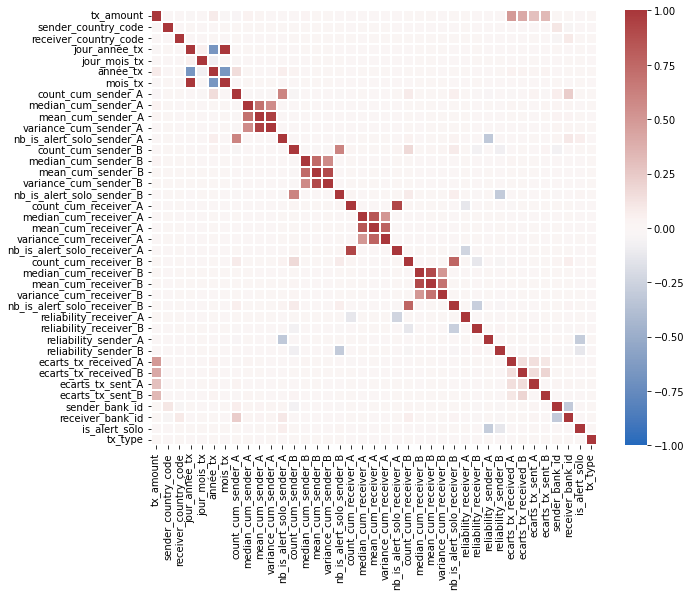

In [170]:
#Affichage visualisation classique des corrélations entre features
f, ax = plt.subplots(figsize=(10, 8))
# palette de couleurs de la colormap
cmap = sns.color_palette("vlag", as_cmap=True)

sns.heatmap(X_train.corr(), cmap= cmap, linewidths=.3, vmin=-1, vmax=1)

In [171]:
from sklearn.model_selection import RandomizedSearchCV 
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score, roc_auc_score

In [172]:
!pip install imblearn

In [173]:
import imblearn
from imblearn.over_sampling import SMOTE
from collections import Counter

In [190]:
num_cols= ['tx_amount',
       'count_cum_sender_A', 'median_cum_sender_A', 'mean_cum_sender_A',
       'variance_cum_sender_A', 'nb_is_alert_solo_sender_A',
       'count_cum_sender_B', 'median_cum_sender_B', 'mean_cum_sender_B',
       'variance_cum_sender_B', 'nb_is_alert_solo_sender_B',
       'count_cum_receiver_A', 'median_cum_receiver_A', 'mean_cum_receiver_A',
       'variance_cum_receiver_A', 'nb_is_alert_solo_receiver_A',
       'count_cum_receiver_B', 'median_cum_receiver_B', 'mean_cum_receiver_B',
       'variance_cum_receiver_B', 'nb_is_alert_solo_receiver_B',
       'reliability_receiver_A', 'reliability_receiver_B',
       'reliability_sender_A', 'reliability_sender_B', 'ecarts_tx_received_A',
       'ecarts_tx_received_B', 'ecarts_tx_sent_A', 'ecarts_tx_sent_B']

cat_cols= ['sender_country_code', 'receiver_country_code',
       'jour_année_tx', 'jour_mois_tx', 'année_tx', 'mois_tx',
       'sender_bank_id', 'receiver_bank_id', 'is_alert_solo', 'tx_type']

In [191]:
def evaluation_classifier(df_to_split, time, delta, scaler_, classifier, SMote, feature_importance, affichage):
    "fonction pipeline qui met tous les éléments bout à bout"
    " scaler_: le scaler à utiliser "
    "classifier : classifier à utiliser "
    "SMote : True ou False"
    "feature_importance : True ou False"
    " affichage : True ou False"
    #X_train, X_test, y_train, y_test
    X_train, X_test, y_train, y_test = train_test_split_time(df_to_split,time,delta)


    #Resampling 
    if SMote == True : 
        
        print('Original dataset shape %s' % Counter(y_train))
        sm = SMOTE(sampling_strategy= 0.3) #rapport classe minoritaire sur classe majoritaire
        X_train, y_train = sm.fit_resample(X_train, y_train)
        print('Resampled dataset shape %s' % Counter(y_train))



    #Scaling
    scaler=scaler_
    #X_train = scaler.fit_transform(X_train) #fit_transform is a easy way to do the following normally 
    #X_test= scaler.transform(X_test)
    X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train[num_cols]),index=X_train.index, columns= num_cols)
    X_test_scaled = pd.DataFrame(scaler.transform(X_test[num_cols]),index=X_test.index, columns= num_cols)

    X_train = pd.concat([X_train_scaled,X_train[cat_cols]],axis=1)
    X_test = pd.concat([X_test_scaled,X_test[cat_cols]],axis=1)
    X_t= X_train.copy()

    #Entrainement du modèle et prédictions
    model=classifier
    model.fit(X_train, y_train) 
    predictions= model.predict(X_test)
    if affichage== True: 
        print('train')
        print(classification_report(y_train,model.predict(X_train)))
        print('test')
        print(classification_report(y_test,predictions))
        sns.heatmap(confusion_matrix(y_test,predictions),annot=True)
    
    #Affichage du recall
    

    #Affichage des paramètres du modèle
    #print(model.best_params_)

    #Affichage des features importances
    if feature_importance == True: 
        importances = model.feature_importances_
        indices = np.argsort(importances)
        fig, ax = plt.subplots(figsize=(7,8))
        ax.barh(range(len(importances)), importances[indices]*100)
        ax.set_yticks(range(len(importances)), colors='royalblue')
        _ = ax.set_yticklabels(np.array(X_t.columns)[indices])
        plt.grid()
        plt.title("Importance de chacune des features sur is_alert_pooled en %")
        plt.show() 





    return([recall_score(y_test, predictions , pos_label=1, average='binary'), f1_score(y_test, predictions , pos_label=1, average='binary'), precision_score(y_test, predictions , pos_label=1, average='binary')])

## RandomForestClassifier

### Sans rééchantillonage 

% Test/(Test + Train) : 31.625843289145894
train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    337966
           1       1.00      1.00      1.00       443

    accuracy                           1.00    338409
   macro avg       1.00      1.00      1.00    338409
weighted avg       1.00      1.00      1.00    338409

test
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    156306
           1       1.00      0.88      0.94       222

    accuracy                           1.00    156528
   macro avg       1.00      0.94      0.97    156528
weighted avg       1.00      1.00      1.00    156528



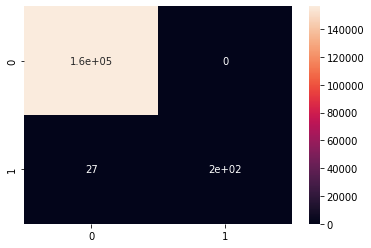

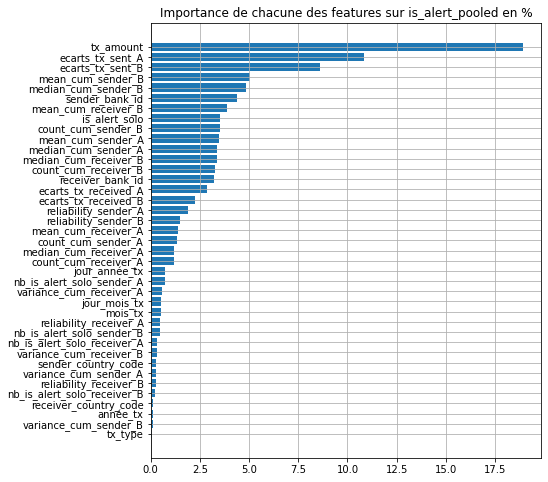

In [192]:
#On fixe la date initiale
time = datetime.datetime(2019, 5, 16)
#On fixe l'horizon
delta= 200

a = evaluation_classifier(df_bis, time, delta, StandardScaler(), RandomForestClassifier(), False, True, True)

### Avec rééchantillonnage 

% Test/(Test + Train) : 31.625843289145894
Original dataset shape Counter({0: 337966, 1: 443})
Resampled dataset shape Counter({0: 337966, 1: 101389})
train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    337966
           1       1.00      1.00      1.00    101389

    accuracy                           1.00    439355
   macro avg       1.00      1.00      1.00    439355
weighted avg       1.00      1.00      1.00    439355

test
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    156306
           1       1.00      0.92      0.96       222

    accuracy                           1.00    156528
   macro avg       1.00      0.96      0.98    156528
weighted avg       1.00      1.00      1.00    156528



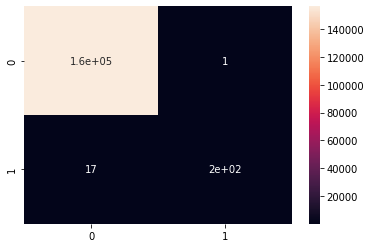

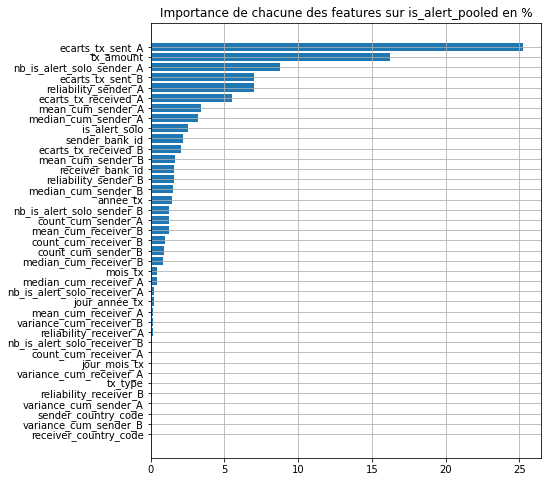

[0.9234234234234234, 0.9579439252336449, 0.9951456310679612]

In [177]:
evaluation_classifier(df_bis, time, delta, StandardScaler(), RandomForestClassifier(), True, True, True)

### On va faire un test de robustesse avec les dates : pour un même horizon (`delta`) on fait varier les dates. 

In [188]:
from tqdm import tqdm

  0%|          | 0/12 [00:00<?, ?it/s]

% Test/(Test + Train) : 23.81602051122679


  8%|▊         | 1/12 [00:33<06:08, 33.49s/it]

% Test/(Test + Train) : 23.58896126941967


 17%|█▋        | 2/12 [01:11<06:01, 36.18s/it]

% Test/(Test + Train) : 21.801782338644344


 25%|██▌       | 3/12 [01:51<05:41, 37.92s/it]

% Test/(Test + Train) : 19.396668144546876


 33%|███▎      | 4/12 [02:31<05:11, 38.92s/it]

% Test/(Test + Train) : 18.213456235453908


 42%|████▏     | 5/12 [03:15<04:45, 40.74s/it]

% Test/(Test + Train) : 17.19467479370608


 50%|█████     | 6/12 [04:04<04:19, 43.24s/it]

% Test/(Test + Train) : 16.360856599766883


 58%|█████▊    | 7/12 [04:52<03:45, 45.03s/it]

% Test/(Test + Train) : 16.59641243693976


 67%|██████▋   | 8/12 [05:43<03:07, 46.82s/it]

% Test/(Test + Train) : 14.832036996463113


 75%|███████▌  | 9/12 [06:45<02:35, 51.73s/it]

% Test/(Test + Train) : 14.150867239757673


 83%|████████▎ | 10/12 [07:49<01:50, 55.42s/it]

% Test/(Test + Train) : 14.609242257663807


 92%|█████████▏| 11/12 [08:54<00:58, 58.21s/it]

% Test/(Test + Train) : 13.014468734742154


100%|██████████| 12/12 [10:02<00:00, 50.23s/it]


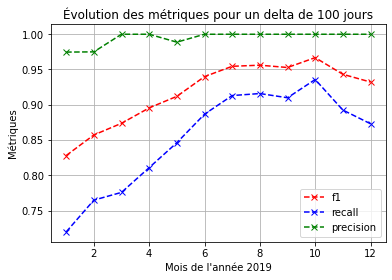

,Moyennes,Ecart-Type
Recall,0.853642,0.067157
Precision,0.994871,0.009471
f1,0.917650,0.042832


In [199]:
Delta= 100

def evolution_metrique_année(year, SMote):
    "Cette fonction renvoie l'évolution des métriques pour chacun des mois de l'année en question ainsi que moyenne et écart-type"
    "SMote : True ou False"
    f1_=[]
    recall_=[]
    precision_=[]
    for j in tqdm(range(1,13)): #on parcourt les mois différents
        i =  evaluation_classifier(df_bis, datetime.datetime(year, j, 16), Delta, StandardScaler(), RandomForestClassifier(), SMote, False, False) #on choisit sans rééchantillonnage
        f1_.append(i[1]) #on stocke f1, recall et precision
        recall_.append(i[0])
        precision_.append(i[2])

    x=[i for i in range(1,13)]
    fig, ax = plt.subplots()
    ax.plot(x, f1_, 'rx--', label='f1')
    ax.plot(x, recall_, 'bx--', label='recall')
    ax.plot(x, precision_, 'gx--', label='precision')
    ax.legend(loc='best')
    ax.set_title(f'Évolution des métriques pour un delta de {Delta} jours')
    ax.set_xlabel(f"Mois de l'année {year}")
    ax.set_ylabel('Métriques')
    plt.grid()
    plt.show()

    df_score=pd.DataFrame({'Moyennes' : [np.mean(recall_), np.mean(precision_) , np.mean(f1_)],
                            'Ecart-Type': [np.std(recall_), np.std(precision_), np.std(f1_)] },
                            index=['Recall', 'Precision','f1'])
    display(df_score)


evolution_metrique_année(2019, False)


  0%|          | 0/12 [00:00<?, ?it/s]

% Test/(Test + Train) : 12.664290045025496


  8%|▊         | 1/12 [01:14<13:43, 74.83s/it]

% Test/(Test + Train) : 12.065828306235082


 17%|█▋        | 2/12 [02:36<13:10, 79.06s/it]

% Test/(Test + Train) : 11.673176195503446


 25%|██▌       | 3/12 [03:58<12:00, 80.07s/it]

% Test/(Test + Train) : 11.385069373461207


 33%|███▎      | 4/12 [05:24<10:59, 82.38s/it]

% Test/(Test + Train) : 11.699038661356578


 42%|████▏     | 5/12 [06:56<10:01, 85.93s/it]

% Test/(Test + Train) : 10.664319734934768


 50%|█████     | 6/12 [08:28<08:49, 88.19s/it]

% Test/(Test + Train) : 10.168841290260271


 58%|█████▊    | 7/12 [10:03<07:31, 90.31s/it]

% Test/(Test + Train) : 9.883449461353104


 67%|██████▋   | 8/12 [14:52<10:14, 153.50s/it]

% Test/(Test + Train) : 9.512534082583706


 75%|███████▌  | 9/12 [16:34<06:52, 137.59s/it]

% Test/(Test + Train) : 9.95039403706394


 83%|████████▎ | 10/12 [18:22<04:16, 128.21s/it]

% Test/(Test + Train) : 9.01616218612712


 92%|█████████▏| 11/12 [20:11<02:02, 122.44s/it]

% Test/(Test + Train) : 8.833201986609568


100%|██████████| 12/12 [22:06<00:00, 110.52s/it]


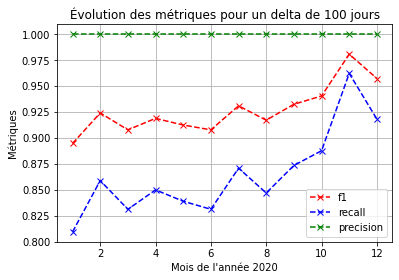

,Moyennes,Ecart-Type
Recall,0.865002,0.040328
Precision,1.000000,0.000000
f1,0.927124,0.022717


In [211]:
evolution_metrique_année(2020, False)

  0%|          | 0/12 [00:00<?, ?it/s]

% Test/(Test + Train) : 9.176935830794049


  8%|▊         | 1/12 [02:04<22:53, 124.83s/it]

% Test/(Test + Train) : 8.287960686885528


 17%|█▋        | 2/12 [04:09<20:49, 124.95s/it]

% Test/(Test + Train) : 8.201019789380183


 25%|██▌       | 3/12 [06:15<18:47, 125.33s/it]

% Test/(Test + Train) : 8.44904764079843


 33%|███▎      | 4/12 [08:28<17:05, 128.22s/it]

% Test/(Test + Train) : 7.762365182083491


 42%|████▏     | 5/12 [10:39<15:04, 129.28s/it]

% Test/(Test + Train) : 7.5334138550291625


 50%|█████     | 6/12 [12:45<12:49, 128.28s/it]

% Test/(Test + Train) : 7.8875827486327434


 58%|█████▊    | 7/12 [15:04<10:57, 131.58s/it]

% Test/(Test + Train) : 7.25748502994012


 67%|██████▋   | 8/12 [17:25<08:58, 134.64s/it]

% Test/(Test + Train) : 7.084847635739795


 75%|███████▌  | 9/12 [19:58<07:01, 140.53s/it]

% Test/(Test + Train) : 5.554760702592585


 83%|████████▎ | 10/12 [22:36<04:51, 145.91s/it]

% Test/(Test + Train) : 2.9678989143949512


 92%|█████████▏| 11/12 [25:28<02:33, 153.93s/it]

% Test/(Test + Train) : 1.0072376746766307


100%|██████████| 12/12 [28:23<00:00, 141.95s/it]


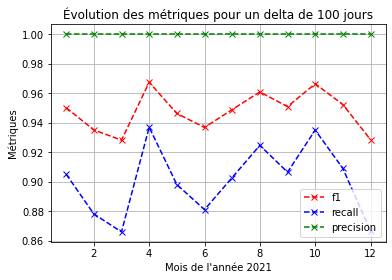

,Moyennes,Ecart-Type
Recall,0.900905,0.023191
Precision,1.000000,0.000000
f1,0.947713,0.012841


In [212]:
evolution_metrique_année(2021, False )

In [ ]:
Delta= 100

evolution_metrique_année(2019, True)

In [ ]:
evolution_metrique_année(2020, True)

In [ ]:
evolution_metrique_année(2021, True)

Interprétation : 

### On va maintenant faire un test de robustesse avec les horizons : pour une même date donnée, on fait varier les horizons. 

In [ ]:
date = datetime.datetime(2020, 11, 16)
Delta= [50, 100, 150, 200, 250, 300, 400, 500]

f1_=[]
recall_=[]
precision_=[]
for delta in tqdm(Delta): #on parcourt les mois différents
  i =  evaluation_classifier(df_bis, date, delta, StandardScaler(), RandomForestClassifier(), False, False, False) #on choisit sans rééchantillonnage
  f1_.append(i[1]) #on stocke f1, recall et precision
  recall_.append(i[0])
  precision_.append(i[2])

x=Delta
fig, ax = plt.subplots()
ax.plot(x, f1_, 'rx--', label='f1')
ax.plot(x, recall_, 'bx--', label='recall')
ax.plot(x, precision_, 'gx--', label='precision')
ax.legend(loc='best')
ax.set_title(f'Évolution des métriques pour une date donnée {date} ')
ax.set_xlabel(" Horizon (delta)")
ax.set_ylabel('Métriques')
plt.grid()
plt.show()

df_score=pd.DataFrame({'Moyennes' : [np.mean(recall_), np.mean(precision_) , np.mean(f1_)],
                            'Ecart-Type': [np.std(recall_), np.std(precision_), np.std(f1_)] },
                            index=['Recall', 'Precision','f1'])
display(df_score)

# XGB

In [ ]:
!pip install xgboost

In [75]:
import xgboost as xgb

### Sans échantillonnage 

% Test/(Test + Train) : 31.625843289145894
train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    337966
           1       1.00      1.00      1.00       443

    accuracy                           1.00    338409
   macro avg       1.00      1.00      1.00    338409
weighted avg       1.00      1.00      1.00    338409

test
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    156306
           1       1.00      0.95      0.97       222

    accuracy                           1.00    156528
   macro avg       1.00      0.98      0.99    156528
weighted avg       1.00      1.00      1.00    156528



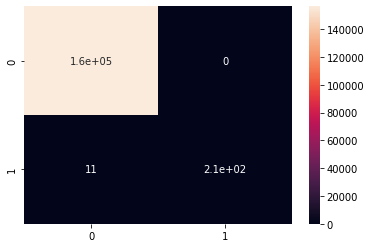

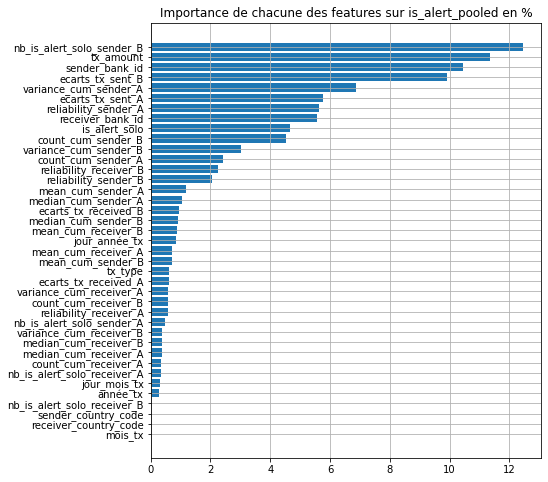

[0.9504504504504504, 0.9745958429561201, 1.0]

In [101]:
evaluation_classifier(df_bis, time, delta, StandardScaler(), xgb.XGBClassifier(), False, True, True  )

## Avec rééchantillonnage 

% Test/(Test + Train) : 31.625843289145894
Original dataset shape Counter({0: 337966, 1: 443})
Resampled dataset shape Counter({0: 337966, 1: 101389})
train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    337966
           1       1.00      1.00      1.00    101389

    accuracy                           1.00    439355
   macro avg       1.00      1.00      1.00    439355
weighted avg       1.00      1.00      1.00    439355

test
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    156306
           1       1.00      0.97      0.98       222

    accuracy                           1.00    156528
   macro avg       1.00      0.98      0.99    156528
weighted avg       1.00      1.00      1.00    156528



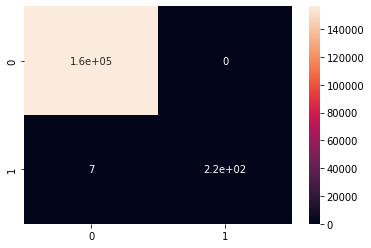

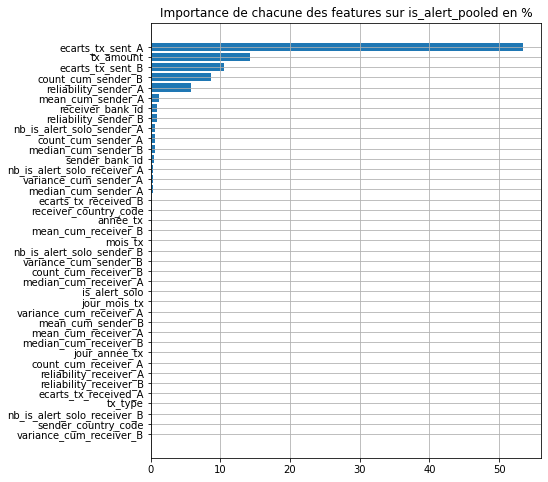

[0.9684684684684685, 0.9839816933638443, 1.0]

In [104]:
evaluation_classifier(df_bis, time, delta, StandardScaler(), xgb.XGBClassifier(), True, True , True)

In [105]:
X_train.columns

Index(['tx_amount', 'count_cum_sender_A', 'median_cum_sender_A',
       'mean_cum_sender_A', 'variance_cum_sender_A',
       'nb_is_alert_solo_sender_A', 'count_cum_sender_B',
       'median_cum_sender_B', 'mean_cum_sender_B', 'variance_cum_sender_B',
       'nb_is_alert_solo_sender_B', 'count_cum_receiver_A',
       'median_cum_receiver_A', 'mean_cum_receiver_A',
       'variance_cum_receiver_A', 'nb_is_alert_solo_receiver_A',
       'count_cum_receiver_B', 'median_cum_receiver_B', 'mean_cum_receiver_B',
       'variance_cum_receiver_B', 'nb_is_alert_solo_receiver_B',
       'reliability_receiver_A', 'reliability_receiver_B',
       'reliability_sender_A', 'reliability_sender_B', 'ecarts_tx_received_A',
       'ecarts_tx_received_B', 'ecarts_tx_sent_A', 'ecarts_tx_sent_B',
       'sender_country_code', 'receiver_country_code', 'jour_année_tx',
       'jour_mois_tx', 'année_tx', 'mois_tx', 'sender_bank_id',
       'receiver_bank_id', 'is_alert_solo', 'tx_type'],
      dtype='object')

# SVM 

In [78]:
from sklearn.svm import LinearSVC

% Test/(Test + Train) : 31.625843289145894


/opt/anaconda3/envs/jupyterlab-3.3.2/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


train


/opt/anaconda3/envs/jupyterlab-3.3.2/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/envs/jupyterlab-3.3.2/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/envs/jupyterlab-3.3.2/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    337966
           1       0.00      0.00      0.00       443

    accuracy                           1.00    338409
   macro avg       0.50      0.50      0.50    338409
weighted avg       1.00      1.00      1.00    338409

test
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    156306
           1       0.00      0.00      0.00       222

    accuracy                           1.00    156528
   macro avg       0.50      0.50      0.50    156528
weighted avg       1.00      1.00      1.00    156528



/opt/anaconda3/envs/jupyterlab-3.3.2/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/envs/jupyterlab-3.3.2/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/envs/jupyterlab-3.3.2/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,

[0.0, 0.0, 0.0]

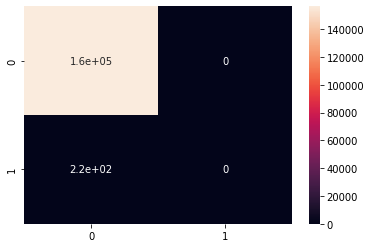

In [193]:
evaluation_classifier(df_bis, time, delta, StandardScaler(), LinearSVC(C=2), False, False, True)

% Test/(Test + Train) : 31.625843289145894
Original dataset shape Counter({0: 337966, 1: 443})
Resampled dataset shape Counter({0: 337966, 1: 101389})


/opt/anaconda3/envs/jupyterlab-3.3.2/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


train
              precision    recall  f1-score   support

           0       0.85      0.99      0.91    337966
           1       0.93      0.40      0.56    101389

    accuracy                           0.85    439355
   macro avg       0.89      0.69      0.74    439355
weighted avg       0.86      0.85      0.83    439355

test
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    156306
           1       0.09      0.38      0.15       222

    accuracy                           0.99    156528
   macro avg       0.55      0.69      0.57    156528
weighted avg       1.00      0.99      1.00    156528



[0.38288288288288286, 0.1520572450805009, 0.09486607142857142]

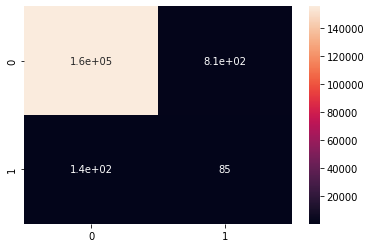

In [194]:
evaluation_classifier(df_bis, time, delta, StandardScaler(), LinearSVC(C=0.5), True, False, True)

# Reg log 

In [195]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

% Test/(Test + Train) : 31.625843289145894


/opt/anaconda3/envs/jupyterlab-3.3.2/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    337966
           1       0.36      0.07      0.11       443

    accuracy                           1.00    338409
   macro avg       0.68      0.53      0.55    338409
weighted avg       1.00      1.00      1.00    338409

test
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    156306
           1       0.64      0.03      0.06       222

    accuracy                           1.00    156528
   macro avg       0.82      0.52      0.53    156528
weighted avg       1.00      1.00      1.00    156528



[0.03153153153153153, 0.060085836909871244, 0.6363636363636364]

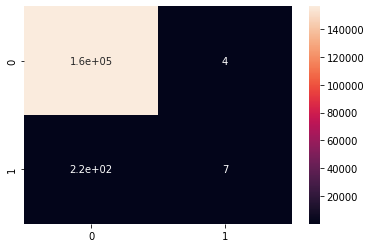

In [196]:
evaluation_classifier(df_bis, time, delta, StandardScaler(), LogisticRegression(), False, False, True)

% Test/(Test + Train) : 31.625843289145894
Original dataset shape Counter({0: 337966, 1: 443})
Resampled dataset shape Counter({0: 337966, 1: 101389})


/opt/anaconda3/envs/jupyterlab-3.3.2/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


train
              precision    recall  f1-score   support

           0       0.87      0.97      0.91    337966
           1       0.83      0.50      0.62    101389

    accuracy                           0.86    439355
   macro avg       0.85      0.73      0.77    439355
weighted avg       0.86      0.86      0.85    439355

test
              precision    recall  f1-score   support

           0       1.00      0.97      0.99    156306
           1       0.02      0.35      0.03       222

    accuracy                           0.97    156528
   macro avg       0.51      0.66      0.51    156528
weighted avg       1.00      0.97      0.98    156528



[0.34684684684684686, 0.03313253012048193, 0.017397198373248983]

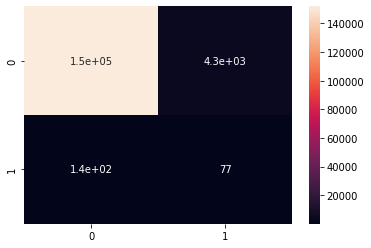

In [197]:
evaluation_classifier(df_bis, time, delta, StandardScaler(), LogisticRegression(), True, False, True)

## Optimisation des hyperparamètres

### RandomForestClassifier

In [ ]:
recall=make_scorer(recall_score)
precision=make_scorer(precision_score)
f1=make_scorer(f1_score)

In [ ]:
def score_cv(model, X_train,y_train,cv):
    " Objectif : renvoyer un df contenant la moyenne des scores recall et précision"
    " On prend en argument un modèle, X_train, y_train, et un nombre correspondant au nombre de splits souhaités" 
    
    scores_recall = cross_val_score(model, X_train, y_train, cv=cv, scoring=recall)
    scores_precision= cross_val_score(model, X_train, y_train, cv=cv, scoring=precision)
    scores_f1= cross_val_score(model, X_train, y_train, cv=cv, scoring=f1)
    df_score_cv=pd.DataFrame({'Moyennes' : [scores_recall.mean(), scores_precision.mean() , scores_f1.mean()],
                          'Ecart-Type': [scores_recall.std(), scores_precision.std(), scores_f1.std()] },
                        index=['Recall', 'Precision','f1'])
    return df_score_cv 

In [ ]:
#Paramètres 
n_estimators =[100,200,400,800,100,1200] #nombre d'arbres dans la forêt
max_features = ['sqrt', 'log2', None] #nombre max de features, je me sers de la doc sklearn pour connaître les valeurs possibles 
max_depth= [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None] #profondeur des arbres
min_samples_leaf=[1, 2, 4, 10, 50, 100 , 200, 500, 1000] #nombre d'observations mini représenté par chaque feuille
min_samples_split= [2, 5, 10, 100 ,200 , 500, 1000] #nombre mini d'observations requises pour diviser un noeud 
bootstrap=[True, False] #bootstrap resampling


param_grid={'n_estimators': n_estimators,
            'max_features': max_features,
            'max_depth': max_depth,
            'min_samples_leaf': min_samples_leaf,
            'min_samples_split': min_samples_split,
            'bootstrap': bootstrap}

#Modèle
clf=RandomForestClassifier()

# On tire ces paramètres aléatoirement parmis les valeurs proposées
# On évalue ces modèles par cross validation  
# On essaie n_itre tirages différents pour les paramètres

search= RandomizedSearchCV(estimator = clf, param_distributions = param_grid, 
                                n_iter = 10, cv = 2, verbose=2, random_state=1, n_jobs = -1,scoring=f1)
#On va tester des modèles différents, chacun d'entre eux aura des paramètres séléctionnés au hasard parmi ceux de 
#param_grid. On choisit le f1 comme score à maximiser.
search.fit(X_train,y_train)

Fitting 2 folds for each of 10 candidates, totalling 20 fits
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=100, min_samples_split=200, n_estimators=200; total time= 1.1min
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=100, min_samples_split=200, n_estimators=200; total time= 1.1min
[CV] END bootstrap=True, max_depth=50, max_features=log2, min_samples_leaf=200, min_samples_split=200, n_estimators=400; total time= 2.1min
[CV] END bootstrap=True, max_depth=50, max_features=log2, min_samples_leaf=200, min_samples_split=200, n_estimators=400; total time= 2.1min
[CV] END bootstrap=True, max_depth=None, max_features=None, min_samples_leaf=2, min_samples_split=500, n_estimators=100; total time= 3.6min
[CV] END bootstrap=True, max_depth=None, max_features=None, min_samples_leaf=2, min_samples_split=500, n_estimators=100; total time= 4.0min
[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=2,

RandomizedSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, None],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4, 10, 50,
                                                             100, 200, 500,
                                                             1000],
                                        'min_samples_split': [2, 5, 10, 100,
                                                              200, 500, 1000],
                                        'n_estimators': [100, 200, 400, 800,
                                                         100, 1200]},
                   random_state=1, scoring=make_scorer(f1_score), verbose=2)

In [ ]:
search.best_params_

{'n_estimators': 100,
 'min_samples_split': 100,
 'min_samples_leaf': 10,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': True}

In [ ]:
clf=RandomForestClassifier()
param_grid={'n_estimators':[100,200],
            'max_features': ['sqrt'],
            'max_depth': [None],
            'min_samples_leaf': [4,10],
            'min_samples_split': [100,200],
            'bootstrap': [True]}

grid_search = GridSearchCV(clf,param_grid, cv = 3, n_jobs = -1, scoring=f1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [None],
                         'max_features': ['sqrt'], 'min_samples_leaf': [4, 10],
                         'min_samples_split': [100, 200],
                         'n_estimators': [100, 200]},
             scoring=make_scorer(f1_score))

In [ ]:
grid_search.best_estimator_

RandomForestClassifier(min_samples_leaf=4, min_samples_split=100,
                       n_estimators=200)

In [ ]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 100,
 'n_estimators': 200}

In [ ]:
best_RF_clf= grid_search.best_estimator_ 

% Test/(Test + Train) : 31.625843289145894
Original dataset shape Counter({0: 337966, 1: 443})
Resampled dataset shape Counter({0: 337966, 1: 101389})
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    156306
           1       0.99      0.91      0.95       222

    accuracy                           1.00    156528
   macro avg       1.00      0.96      0.98    156528
weighted avg       1.00      1.00      1.00    156528



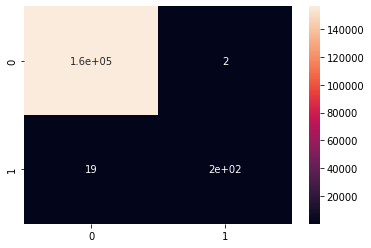

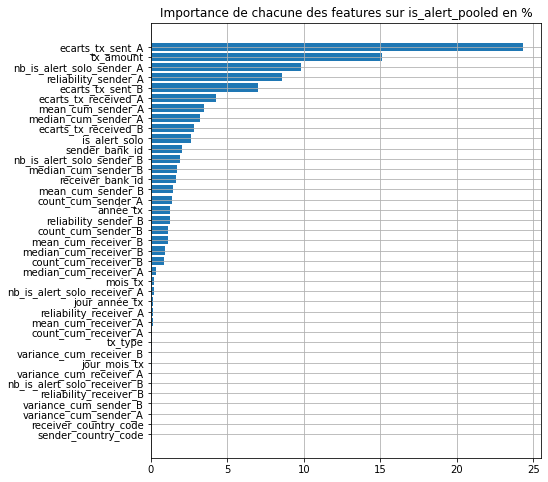

[0.9144144144144144, 0.9508196721311476]

In [ ]:
evaluation_classifier(df_bis, time, delta, StandardScaler(), best_RF_clf, True, True, True )

## XGB

In [ ]:
xgb_clf = xgb.XGBClassifier()


random_search=RandomizedSearchCV(xgb_clf, 
                                 param_distributions={'objective':['binary:logistic'],
                                              'n_estimators': [200, 400, 600, 800,1000],
                                              'max_features': ['auto', 'sqrt', 'log2'],
                                              'max_depth' : [10, 20, 30, 40],
                                              'learning_rate': [0.1, 0.05, 0.01],
                                              'criterion' :['gini', 'entropy'],
                                              'bootstrap' : [True, False]},
                                               verbose=2, random_state=1, n_jobs = -1, cv=3, scoring=f1)

#param_grid. On choisit le f1 comme score à maximiser.
random_search.fit(X_train,y_train)

In [ ]:
random_search.best_params_

In [ ]:
param_grid={'objective': ['binary:logistic'],
            'n_estimators': [400, 600, 800],
            'max_features': ['sqrt'],
            'max_depth': [30,40, 50],
            'learning_rate': [0.05,0.1],
            'criterion': ['entropy'],
            'bootstrap': [False] }

grid_search = GridSearchCV(xgb_clf,param_grid, cv = 3, n_jobs = -1, scoring=recall)
grid_search.fit(X_train, y_train)

In [ ]:
best_XGB_clf= grid_search.best_estimator_

In [ ]:
evaluation_classifier(df_bis, time, delta, StandardScaler(), best_XGB_clf, True, True, True )

## On va s'intéresser à `is_alert_pooled` sans feature engineering 

In [ ]:
variables_to_keep = ['tx_amount','timestamp', 'tx_type',
       
       'sender_country_code', 'sender_birth_date',
       'receiver_country_code', 'receiver_birth_date',

       'jour_année_tx', 'jour_mois_tx', 'année_tx', 'mois_tx',

       'sender_bank_id','receiver_bank_id',

       'is_alert_solo', 'is_alert_pooled']

variables_to_drop = ['tx_id', 'sender_account_id', 'receiver_account_id', 'sender_first_name',
       'sender_last_name', 'sender_zip_code', 'receiver_first_name',
       'receiver_last_name', 'receiver_zip_code', 
                     
       'count_cum_sender_A', 'median_cum_sender_A', 'mean_cum_sender_A',
       'variance_cum_sender_A', 'nb_is_alert_solo_sender_A',

       'count_cum_sender_B', 'median_cum_sender_B', 'mean_cum_sender_B',
       'variance_cum_sender_B', 'nb_is_alert_solo_sender_B',

       'count_cum_receiver_A', 'median_cum_receiver_A', 'mean_cum_receiver_A',
       'variance_cum_receiver_A', 'nb_is_alert_solo_receiver_A',

       'count_cum_receiver_B', 'median_cum_receiver_B', 'mean_cum_receiver_B',
       'variance_cum_receiver_B', 'nb_is_alert_solo_receiver_B',

       'reliability_receiver_A', 'reliability_receiver_B',
       'reliability_sender_A', 'reliability_sender_B', 

       'ecarts_tx_received_A','ecarts_tx_received_B', 
       'ecarts_tx_sent_A', 'ecarts_tx_sent_B',
]

In [ ]:
df3_=df_bis[variables_to_keep]

#On fixe la date initiale
time = datetime.datetime(2019, 5, 16)
#On fixe l'horizon
delta= 200

evaluation_classifier(df3, time, delta, StandardScaler(), RandomForestClassifier(), True, True, True)

% Test/(Test + Train) : 31.625843289145894


# Uniquement sur les informations de A maintenant

On ne garde que les variables relatives aux informations de A. Compte tenu du sujet, nous devrions obtenir de moins bons résultats qu'avec les informations de A ET de B. 


D'autre part, on fait le choix d'enlever toutes les features liées à is_alert_solo, à savoir : 
`is_alert_solo`,`reliability`, `nb_is_alert_solo`.

In [109]:
df_A=pd.read_csv('/Users/Corentin/Desktop/statapp/transactions_A.csv')
df_B=pd.read_csv('/Users/Corentin/Desktop/statapp/transactions_B.csv')

L1 = list(df_A['tx_id'].values) 

In [135]:
# On fait le tri dans les variables 
variables_to_keep = ['tx_amount','timestamp', 'tx_type',
       
       'sender_country_code', 'sender_birth_date',
       'receiver_country_code', 'receiver_birth_date',

       'jour_année_tx', 'jour_mois_tx', 'année_tx', 'mois_tx',

       'count_cum_sender_A', 'median_cum_sender_A', 'mean_cum_sender_A',
       'variance_cum_sender_A', 

       'count_cum_receiver_A', 'median_cum_receiver_A', 'mean_cum_receiver_A',
       'variance_cum_receiver_A',

       'ecarts_tx_received_A',
       'ecarts_tx_sent_A',

       'sender_bank_id','receiver_bank_id',

       'is_alert_pooled']

variables_to_drop = ['tx_id', 'sender_account_id', 'receiver_account_id', 'sender_first_name',
       'sender_last_name', 'sender_zip_code', 'receiver_bank_id', 'receiver_first_name',
       'receiver_last_name', 'receiver_zip_code',
       'count_cum_sender_B', 'median_cum_sender_B', 'mean_cum_sender_B',
       'variance_cum_sender_B', 'nb_is_alert_solo_sender_B',
       'count_cum_receiver_B', 'median_cum_receiver_B', 'mean_cum_receiver_B',
       'variance_cum_receiver_B', 'nb_is_alert_solo_receiver_B',
       'reliability_receiver_B','reliability_sender_B', 'ecarts_tx_received_B', 'ecarts_tx_sent_B'
       
       'reliability_receiver_A', 
       'reliability_sender_A', 

       'nb_is_alert_solo_sender_A', 'nb_is_alert_solo_receiver_A',

       'is_alert_solo', 
       ]

df_bis2= df_bis[variables_to_keep].copy()



In [136]:
num_cols= ['tx_amount',
       'count_cum_sender_A', 'median_cum_sender_A', 'mean_cum_sender_A',
       'variance_cum_sender_A', 
       'count_cum_receiver_A', 'median_cum_receiver_A', 'mean_cum_receiver_A',
       'variance_cum_receiver_A', 
       'ecarts_tx_received_A',
       'ecarts_tx_sent_A']

cat_cols= ['sender_country_code', 'receiver_country_code',
       'jour_année_tx', 'jour_mois_tx', 'année_tx', 'mois_tx',
       'sender_bank_id', 'receiver_bank_id', 'tx_type']

837951
% Test/(Test + Train) : 31.645156062958375
Original dataset shape Counter({0: 261190, 1: 337})
Resampled dataset shape Counter({0: 261190, 1: 78357})
train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    261190
           1       1.00      1.00      1.00     78357

    accuracy                           1.00    339547
   macro avg       1.00      1.00      1.00    339547
weighted avg       1.00      1.00      1.00    339547

test
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    120891
           1       1.00      0.97      0.98       184

    accuracy                           1.00    121075
   macro avg       1.00      0.98      0.99    121075
weighted avg       1.00      1.00      1.00    121075



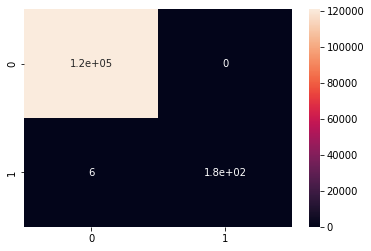

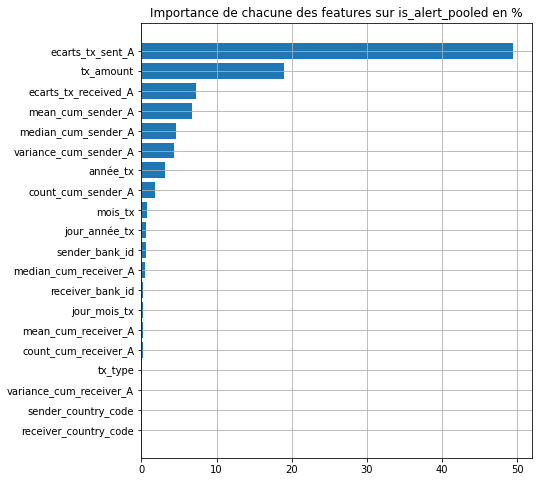

[0.967391304347826, 0.9834254143646408, 1.0]

In [137]:
#On fixe la date initiale
time = datetime.datetime(2019, 5, 16)
#On fixe l'horizon
delta= 200

#On enlève les différentes banques 
df3 = df_bis2[(df_bis2['sender_bank_id']== 0 )|((df_bis2['receiver_bank_id'] == 0 ))]

print(len(df3))

evaluation_classifier(df3, time, delta, StandardScaler(), RandomForestClassifier(), True, True, True)

% Test/(Test + Train) : 31.645156062958375
Original dataset shape Counter({0: 261190, 1: 337})
Resampled dataset shape Counter({0: 261190, 1: 78357})
train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    261190
           1       1.00      1.00      1.00     78357

    accuracy                           1.00    339547
   macro avg       1.00      1.00      1.00    339547
weighted avg       1.00      1.00      1.00    339547

test
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    120891
           1       1.00      0.97      0.98       184

    accuracy                           1.00    121075
   macro avg       1.00      0.98      0.99    121075
weighted avg       1.00      1.00      1.00    121075



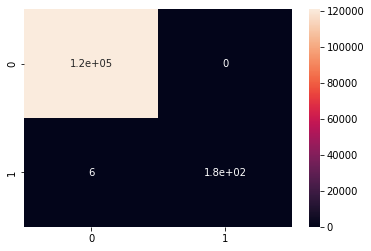

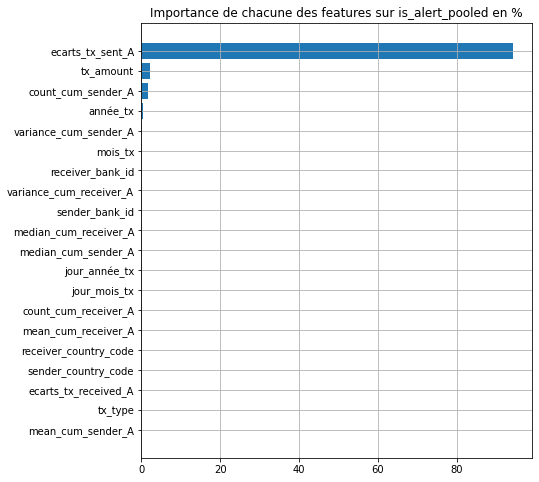

[0.967391304347826, 0.9834254143646408, 1.0]

In [138]:
#xgb 

evaluation_classifier(df3, time, delta, StandardScaler(), xgb.XGBClassifier(), True, True, True)

## On fait la même chose pour B 

In [200]:
# On fait le tri dans les variables 
variables_to_keep = ['tx_amount','timestamp', 'tx_type',
       
       'sender_country_code', 'sender_birth_date',
       'receiver_country_code', 'receiver_birth_date',

       'jour_année_tx', 'jour_mois_tx', 'année_tx', 'mois_tx',

       'count_cum_sender_B', 'median_cum_sender_B', 'mean_cum_sender_B',
       'variance_cum_sender_B', 

       'count_cum_receiver_B', 'median_cum_receiver_B', 'mean_cum_receiver_B',
       'variance_cum_receiver_B',

       'ecarts_tx_received_B',
       'ecarts_tx_sent_B',

       'sender_bank_id','receiver_bank_id', 
       'is_alert_pooled']
        
optionals_variable = ['is_alert_solo',

       'reliability_receiver_B', 
       'reliability_sender_B', 

       'nb_is_alert_solo_sender_B', 'nb_is_alert_solo_receiver_B']

#on enlève même is_alert_solo

df_bis2= df_bis[variables_to_keep].copy()

In [201]:
num_cols= ['tx_amount',
       'count_cum_sender_B', 'median_cum_sender_B', 'mean_cum_sender_B',
       'variance_cum_sender_B', 
       'count_cum_receiver_B', 'median_cum_receiver_B', 'mean_cum_receiver_B',
       'variance_cum_receiver_B', 
       'ecarts_tx_received_B',
       'ecarts_tx_sent_B']

cat_cols= ['sender_country_code', 'receiver_country_code',
       'jour_année_tx', 'jour_mois_tx', 'année_tx', 'mois_tx',
       'sender_bank_id', 'receiver_bank_id', 'tx_type']

### Avec uniquement les infos de B sur les tx de B 

### SANS IS_ALERT_SOLO

458050
% Test/(Test + Train) : 31.62555133370248
Original dataset shape Counter({0: 143062, 1: 177})
Resampled dataset shape Counter({0: 143062, 1: 42918})
train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    143062
           1       1.00      1.00      1.00     42918

    accuracy                           1.00    185980
   macro avg       1.00      1.00      1.00    185980
weighted avg       1.00      1.00      1.00    185980

test
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     66179
           1       0.28      0.65      0.39        74

    accuracy                           1.00     66253
   macro avg       0.64      0.82      0.69     66253
weighted avg       1.00      1.00      1.00     66253



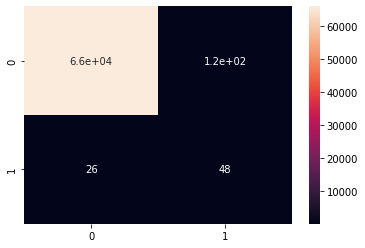

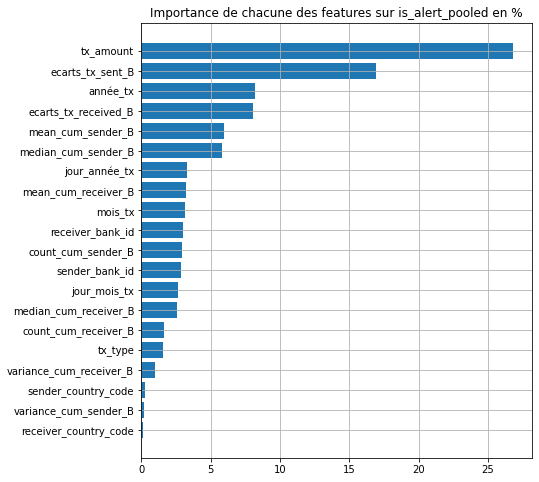

[0.6486486486486487, 0.39024390243902435, 0.27906976744186046]

In [202]:
#On fixe la date initiale
time = datetime.datetime(2019, 5, 16)
#On fixe l'horizon
delta= 200

#On enlève les différentes banques 
df3 = df_bis2[(df_bis2['sender_bank_id']== 1 )|((df_bis2['receiver_bank_id'] == 1 ))] #on met maintenant 1 car il s'agit de la banque B 

print(len(df3))

evaluation_classifier(df3, time, delta, StandardScaler(), RandomForestClassifier(), True, True, True)

% Test/(Test + Train) : 31.62555133370248
Original dataset shape Counter({0: 143062, 1: 177})
Resampled dataset shape Counter({0: 143062, 1: 42918})
train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    143062
           1       1.00      1.00      1.00     42918

    accuracy                           1.00    185980
   macro avg       1.00      1.00      1.00    185980
weighted avg       1.00      1.00      1.00    185980

test
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     66179
           1       0.57      0.62      0.60        74

    accuracy                           1.00     66253
   macro avg       0.79      0.81      0.80     66253
weighted avg       1.00      1.00      1.00     66253



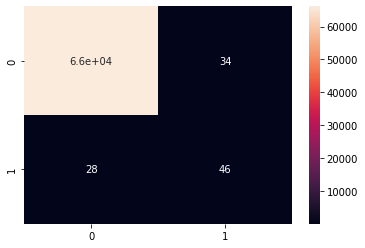

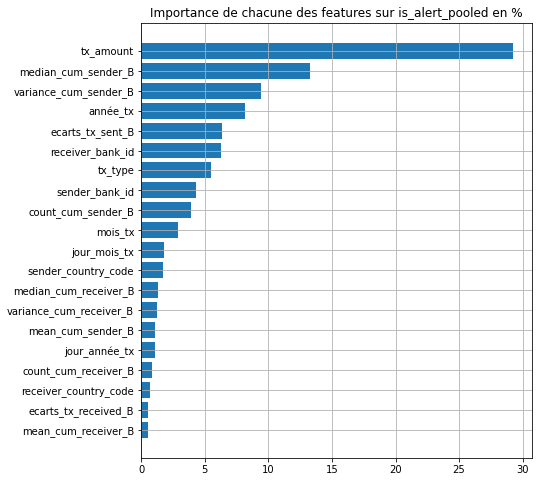

[0.6216216216216216, 0.5974025974025973, 0.575]

In [203]:
evaluation_classifier(df3, time, delta, StandardScaler(), xgb.XGBClassifier(), True, True, True)

### Avec IS_ALERT_SOLO

In [204]:
variables_to_keep = variables_to_keep + optionals_variable

df_bis2= df_bis[variables_to_keep].copy()

In [205]:
num_cols= ['tx_amount',
       'count_cum_sender_B', 'median_cum_sender_B', 'mean_cum_sender_B',
       'variance_cum_sender_B', 
       'count_cum_receiver_B', 'median_cum_receiver_B', 'mean_cum_receiver_B',
       'variance_cum_receiver_B', 
       'ecarts_tx_received_B',
       'ecarts_tx_sent_B', 'reliability_receiver_B', 
       'reliability_sender_B', 

       'nb_is_alert_solo_sender_B', 'nb_is_alert_solo_receiver_B' ]

cat_cols= ['sender_country_code', 'receiver_country_code',
       'jour_année_tx', 'jour_mois_tx', 'année_tx', 'mois_tx',
       'sender_bank_id', 'receiver_bank_id', 'tx_type', 'is_alert_solo']

458050
% Test/(Test + Train) : 31.62555133370248
Original dataset shape Counter({0: 143062, 1: 177})
Resampled dataset shape Counter({0: 143062, 1: 42918})
train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    143062
           1       1.00      1.00      1.00     42918

    accuracy                           1.00    185980
   macro avg       1.00      1.00      1.00    185980
weighted avg       1.00      1.00      1.00    185980

test
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     66179
           1       0.46      0.58      0.51        74

    accuracy                           1.00     66253
   macro avg       0.73      0.79      0.76     66253
weighted avg       1.00      1.00      1.00     66253



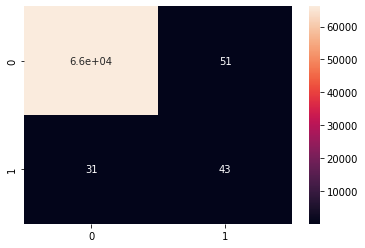

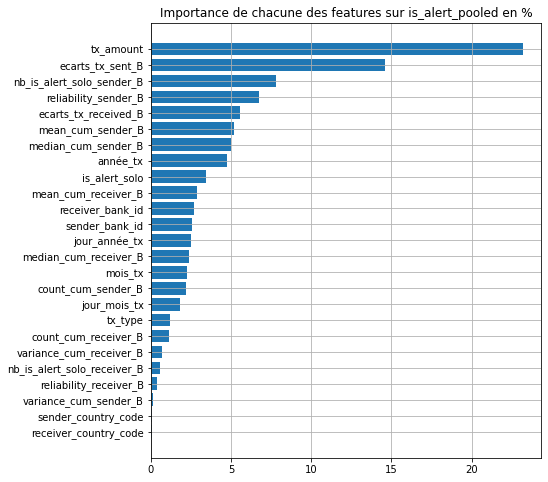

[0.581081081081081, 0.5119047619047619, 0.4574468085106383]

In [206]:
#On fixe la date initiale
time = datetime.datetime(2019, 5, 16)
#On fixe l'horizon
delta= 200

#On enlève les différentes banques 
df3 = df_bis2[(df_bis2['sender_bank_id']== 1 )|((df_bis2['receiver_bank_id'] == 1 ))] #on met maintenant 1 car il s'agit de la banque B 

print(len(df3))

evaluation_classifier(df3, time, delta, StandardScaler(), RandomForestClassifier(), True, True, True)

% Test/(Test + Train) : 31.62555133370248
Original dataset shape Counter({0: 143062, 1: 177})
Resampled dataset shape Counter({0: 143062, 1: 42918})
train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    143062
           1       1.00      1.00      1.00     42918

    accuracy                           1.00    185980
   macro avg       1.00      1.00      1.00    185980
weighted avg       1.00      1.00      1.00    185980

test
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     66179
           1       0.40      0.66      0.50        74

    accuracy                           1.00     66253
   macro avg       0.70      0.83      0.75     66253
weighted avg       1.00      1.00      1.00     66253



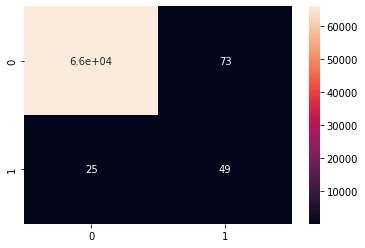

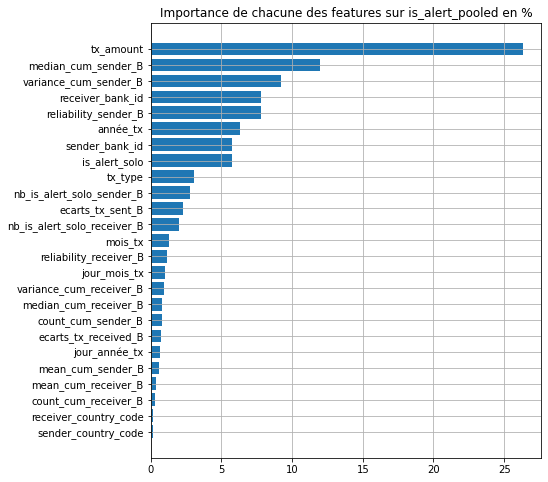

[0.6621621621621622, 0.5, 0.4016393442622951]

In [207]:
evaluation_classifier(df3, time, delta, StandardScaler(), xgb.XGBClassifier(), True, True, True)

### Avec les infos de A et B sur les tx de B 

In [208]:
num_cols= ['tx_amount',
       'count_cum_sender_A', 'median_cum_sender_A', 'mean_cum_sender_A',
       'variance_cum_sender_A', 'nb_is_alert_solo_sender_A',
       'count_cum_sender_B', 'median_cum_sender_B', 'mean_cum_sender_B',
       'variance_cum_sender_B', 'nb_is_alert_solo_sender_B',
       'count_cum_receiver_A', 'median_cum_receiver_A', 'mean_cum_receiver_A',
       'variance_cum_receiver_A', 'nb_is_alert_solo_receiver_A',
       'count_cum_receiver_B', 'median_cum_receiver_B', 'mean_cum_receiver_B',
       'variance_cum_receiver_B', 'nb_is_alert_solo_receiver_B',
       'reliability_receiver_A', 'reliability_receiver_B',
       'reliability_sender_A', 'reliability_sender_B', 'ecarts_tx_received_A',
       'ecarts_tx_received_B', 'ecarts_tx_sent_A', 'ecarts_tx_sent_B']

cat_cols= ['sender_country_code', 'receiver_country_code',
       'jour_année_tx', 'jour_mois_tx', 'année_tx', 'mois_tx',
       'sender_bank_id', 'receiver_bank_id', 'is_alert_solo', 'tx_type']

% Test/(Test + Train) : 31.62555133370248
Original dataset shape Counter({0: 143062, 1: 177})
Resampled dataset shape Counter({0: 143062, 1: 42918})
train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    143062
           1       1.00      1.00      1.00     42918

    accuracy                           1.00    185980
   macro avg       1.00      1.00      1.00    185980
weighted avg       1.00      1.00      1.00    185980

test
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     66179
           1       1.00      0.84      0.91        74

    accuracy                           1.00     66253
   macro avg       1.00      0.92      0.96     66253
weighted avg       1.00      1.00      1.00     66253



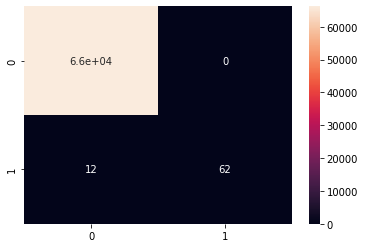

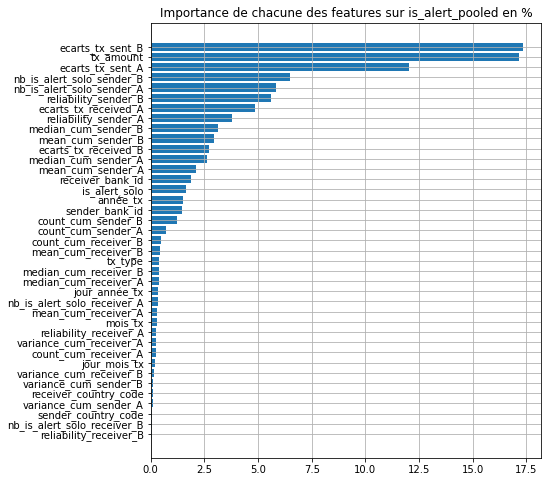

[0.8378378378378378, 0.911764705882353, 1.0]

In [209]:
df_B_bis= df_bis[(df_bis['sender_bank_id']== 1 )|((df_bis['receiver_bank_id'] == 1 ))] #on met maintenant 1 car il s'agit de la banque B 
evaluation_classifier(df_B_bis, time, delta, StandardScaler(), RandomForestClassifier(), True, True, True)

% Test/(Test + Train) : 31.62555133370248
Original dataset shape Counter({0: 143062, 1: 177})
Resampled dataset shape Counter({0: 143062, 1: 42918})
train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    143062
           1       1.00      1.00      1.00     42918

    accuracy                           1.00    185980
   macro avg       1.00      1.00      1.00    185980
weighted avg       1.00      1.00      1.00    185980

test
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     66179
           1       1.00      0.89      0.94        74

    accuracy                           1.00     66253
   macro avg       1.00      0.95      0.97     66253
weighted avg       1.00      1.00      1.00     66253



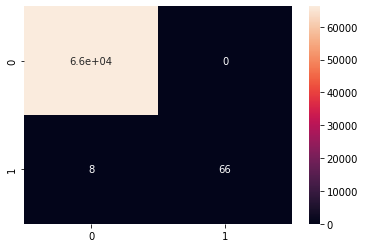

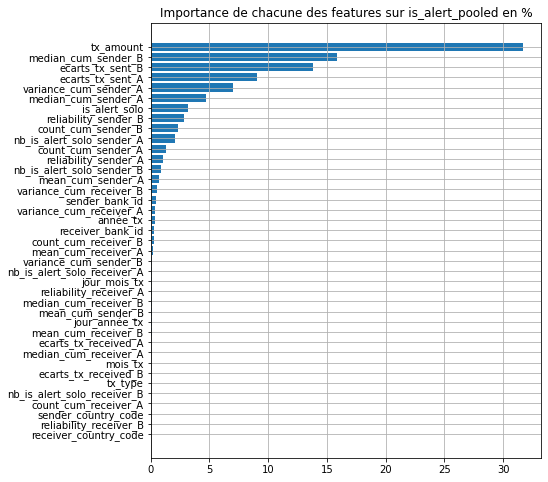

[0.8918918918918919, 0.9428571428571428, 1.0]

In [210]:
evaluation_classifier(df_B_bis, time, delta, StandardScaler(), xgb.XGBClassifier(), True, True, True)

## On s'intéresse maintenant à `is_alert_solo`

In [ ]:
def train_test_split_time_solo(df_to_split,time,delta):
    " fonction qui prend en arg un data frame à split, une date à partir de laquelle on sépare train et test, ainsi qu'un horizon "

    time_1_month = time + datetime.timedelta(days=delta)
    df = filter_df(time, df_to_split)

    X_train=df.drop(['is_alert_solo','is_alert_pooled', 'sender_birth_date', 'receiver_birth_date','timestamp', 
                   'reliability_receiver_A', 'reliability_receiver_B','reliability_sender_A', 'reliability_sender_B',],axis=1)
    y_train= df['is_alert_solo']

    df4 = df_to_split[(df_to_split.timestamp<time_1_month)&(df_to_split.timestamp>=time)]
    X_test = df4.drop(['is_alert_solo','is_alert_pooled', 'sender_birth_date', 'receiver_birth_date','timestamp', 
                   'reliability_receiver_A', 'reliability_receiver_B','reliability_sender_A', 'reliability_sender_B',],axis=1)
    y_test = df4['is_alert_solo']
    print("% Test/(Test + Train) : "+  str(len(X_test)/(len(X_train)+len(X_test))*100))

    return(X_train, X_test, y_train, y_test)

In [ ]:
evaluation_classifier(df3, time, delta, StandardScaler(), RandomForestClassifier(), True)

In [ ]:
evaluation_classifier(df3, time, delta, StandardScaler(), RandomForestClassifier(), False)

In [ ]:
evaluation_classifier(df3, time, delta, StandardScaler(), xgb.XGBClassifier(), True)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00    155524
           1       0.66      0.03      0.06      1004

    accuracy                           0.99    156528
   macro avg       0.83      0.52      0.53    156528
weighted avg       0.99      0.99      0.99    156528

[[155508     16]
 [   973     31]]


<AxesSubplot:>

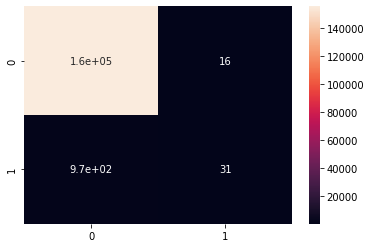

In [ ]:
evaluation_classifier(df3, time, delta, StandardScaler(), xgb.XGBClassifier(), False)